Customer Segmentation using Clustering - Carolyn Massa 3.11.2020
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [2]:

%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")
#http://blog.yhat.com/posts/customer-segmentation-using-python.html

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [3]:

df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [4]:
df_offers.nunique()

offer_id     32
campaign     12
varietal      9
min_qty       4
discount     27
origin        9
past_peak     2
dtype: int64

In [5]:
df_offers.describe() 

,offer_id,min_qty,discount
count,32.000000,32.000000,32.000000
mean,16.500000,65.812500,57.843750
std,9.380832,50.785722,20.770807
min,1.000000,6.000000,17.000000
25%,8.750000,12.000000,44.750000
50%,16.500000,72.000000,55.000000
75%,24.250000,72.000000,82.250000
max,32.000000,144.000000,89.000000


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [6]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [7]:
# We perform an inner join to elimnate those customers that did not buy any wine and those offers that did not work and the customer did not buy anything
df_combined = df_offers.merge(df_transactions, how='inner', left_on='offer_id', right_on='offer_id')

# pivot to create columns as described above
df_combined = df_combined.pivot(index='customer_name', columns='offer_id', values='n')

# Fill NaNs as 0s.
df_combined = df_combined.fillna(0)
df_combined


offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Wilson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Wood,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

Set 2 Answers:  The lower the value of SS the better the clusterings. It was not simple to find the most efficient elbow; to make the bar chart, I decided on K-5
That is where the slope of the graph seems to flatten and curve a bit. 

Text(0.5, 1.0, 'SS vs. k')

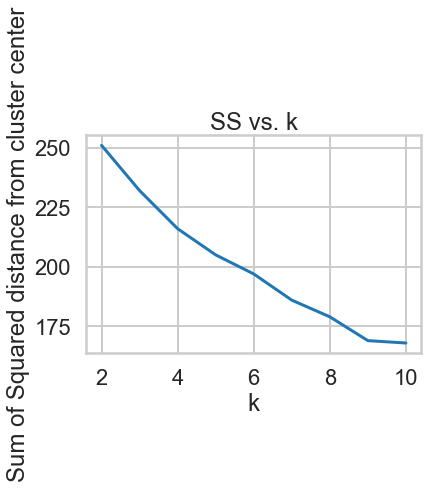

In [8]:
# your turn
# import needed modules
from sklearn.cluster import KMeans
import numpy as np

# Set up x_cols df
x_cols = df_combined.columns

# Select values of K to test
ks = range(2, 11)

# Set up an empty scores list
scores = np.empty_like(ks)

# Create a loop to iterate over different values of k
for i, k in enumerate(ks):
    
    # initiate a KMeans classifier with k clusters
    kmeans = KMeans(n_clusters=k)
    
    # fit the classifier to the data
    y_pred = kmeans.fit_predict(df_combined)
    
    scores[i] = kmeans.inertia_

plt.plot(ks, scores)
plt.xlabel('k')
plt.ylabel('Sum of Squared distance from cluster center')
plt.title('SS vs. k')

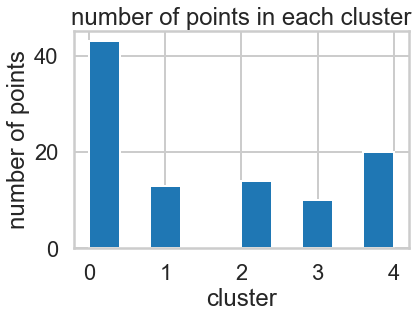

In [9]:
# initiate a KMeans classifier with k clusters
kmeans = KMeans(n_clusters=5)

# fit the classifier to the data
labels = kmeans.fit_predict(df_combined)

# create a bar chart with the number of occurrences of each label
plt.hist(labels)
plt.xlabel('cluster')
plt.ylabel('number of points')
plt.title('number of points in each cluster')
plt.show()

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?
Answer:  After reviewing the Silhouette Charts below I believe that the chart depicting 6 silhouettes is the best separator and has attained the highest score also; this corresponds to what we found in our Elbow plot.(line 8) </p>
</div>

Set 3 Answers:

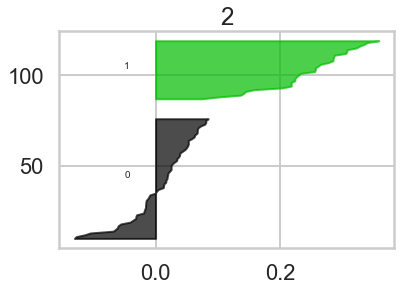

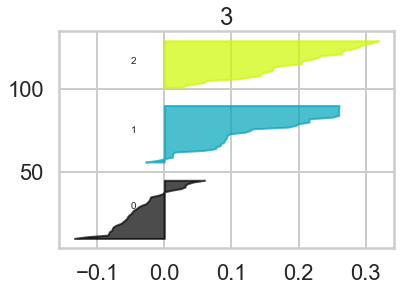

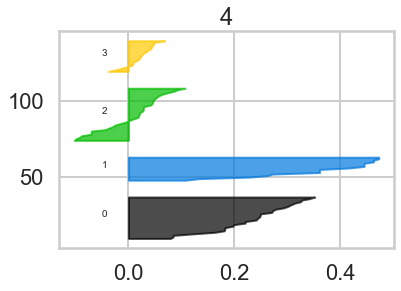

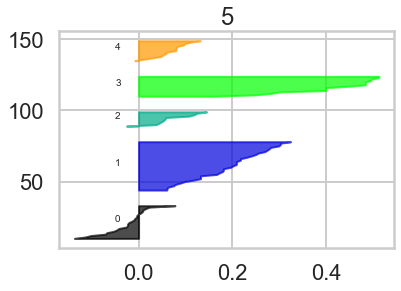

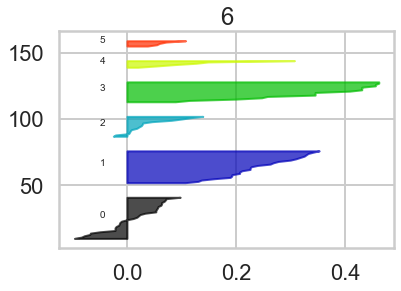

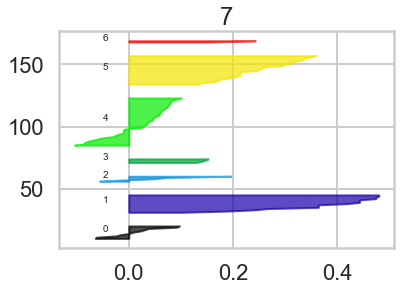

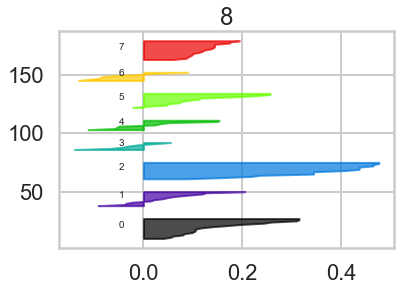

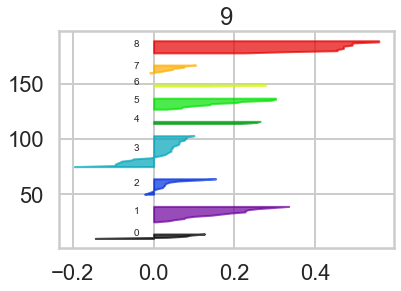

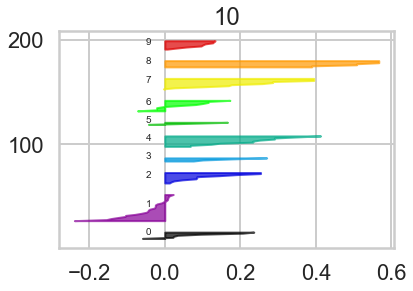

In [12]:
# Your turn.
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from IPython.core.debugger import set_trace

# Set up an empty scores list
sil_scores = np.empty(len(ks))

# Create a loop to iterate over different values of k
for i, k in enumerate(ks):
     # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
  

    # initiate a KMeans classifier with k clusters
    kmeans = KMeans(n_clusters=k)
    
    # fit the classifier to the data
    y_labels = kmeans.fit_predict(df_combined)
    
    # save the sil score
    sil_scores[i] = silhouette_score(df_combined, y_labels)
    
    # Create the silhouette plots
    sample_silhouette_values = silhouette_samples(df_combined, y_labels)
    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[y_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        plt.title(k)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

plt.show()


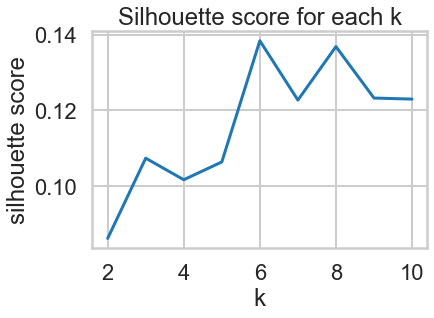

In [11]:

plt.plot(ks, sil_scores)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette score for each k')
plt.show()

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

Answer: The clusters graphed below do not look correct. They are interspersed with each other. I would think we may need 4 clusters though I need to pull out further insights.  I am assuming if there are 3 clusters that each is organized by customers who are divided by the following 3 genres: 1) Wine Varietals, and past peak and country of orgin 2) Those that choose high volume discounts and quantity level 3) Those who response to certain attributes within the 35 offers
I think 3 Clusters should be sufficient to separate our Client Type as the 3 colors look the most distinct from one another.

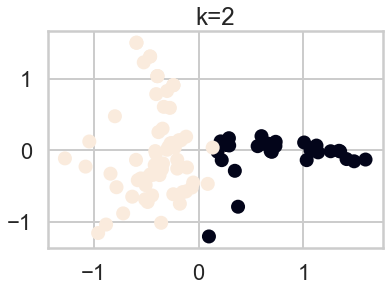

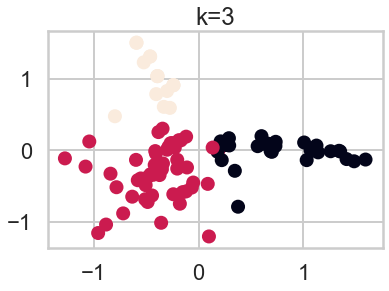

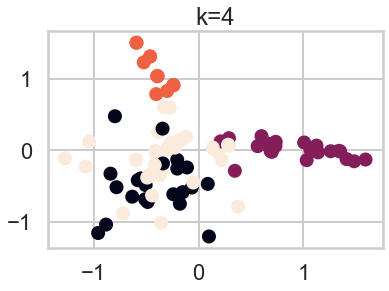

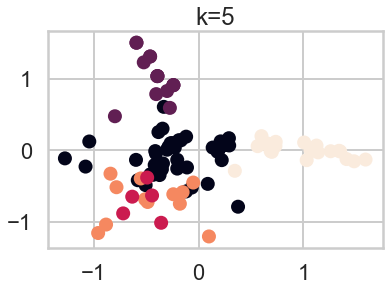

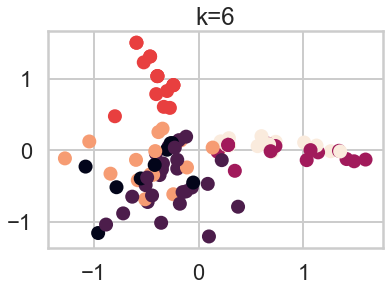

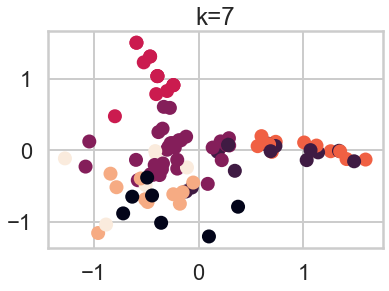

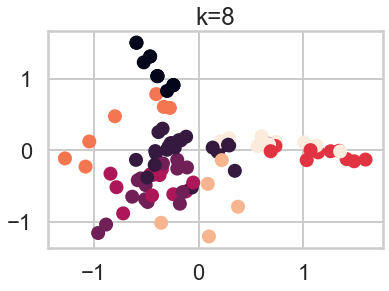

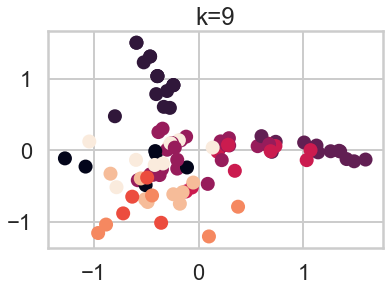

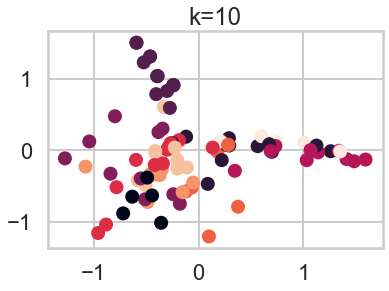

In [15]:
#your turn
from sklearn.decomposition import PCA

for i, k in enumerate(ks):
    
    # initiate a KMeans classifier with k clusters
    kmeans = KMeans(n_clusters=k)
    
    # fit the classifier to the data
    labels = kmeans.fit_predict(df_combined)

    # Use PCA to reduce the features
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(df_combined)

    # create a dataframe as described above
    transformed_df = pd.DataFrame({'customer_name': df_combined.reset_index()['customer_name'], 
                                   'cluster_id': labels, 
                                   'x': reduced_features[:,0],
                                   'y': reduced_features[:,1]})
    plt.scatter(transformed_df.x, transformed_df.y, c=transformed_df['cluster_id'])
    plt.title(f'k={k}')
    plt.show()

To describe this outcome we took the  columns of 0/1 which was the customer offer response indicator and turned them into a 2-D dataset. We call one column x and the other y. Each point is made into a scatterpot with color coding to see them better.  I think K-4 performed the best as it looks more uniform in its separation.

In [16]:
transformed_df.describe()

,cluster_id,x,y
count,100.000000,1.000000e+02,1.000000e+02
mean,4.350000,-4.551914e-17,1.110223e-17
std,2.739074,6.400382e-01,5.545588e-01
min,0.000000,-1.274329e+00,-1.208376e+00
25%,2.000000,-4.217557e-01,-3.309751e-01
50%,4.000000,-2.146355e-01,-7.829880e-03
75%,7.000000,3.541776e-01,1.188929e-01
max,9.000000,1.593182e+00,1.506500e+00


In [17]:
transformed_df.count()

customer_name    100
cluster_id       100
x                100
y                100
dtype: int64

In [18]:
transformed_df.nunique()

customer_name    100
cluster_id        10
x                 93
y                 92
dtype: int64

In [19]:
transformed_df.describe() 

,cluster_id,x,y
count,100.000000,1.000000e+02,1.000000e+02
mean,4.350000,-4.551914e-17,1.110223e-17
std,2.739074,6.400382e-01,5.545588e-01
min,0.000000,-1.274329e+00,-1.208376e+00
25%,2.000000,-4.217557e-01,-3.309751e-01
50%,4.000000,-2.146355e-01,-7.829880e-03
75%,7.000000,3.541776e-01,1.188929e-01
max,9.000000,1.593182e+00,1.506500e+00


What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

In [20]:
df = pd.merge(df_transactions, transformed_df) #here I want to see what clusters each variable was put into
df = pd.merge(df_offers, df)

In [21]:
df.head(25) #Here i review the cluster ID assigned to each grouping


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n,cluster_id,x,y
0,1,January,Malbec,72,56,France,False,Thomas,1,3,-1.041879,0.122314
1,1,January,Malbec,72,56,France,False,Jackson,1,3,-0.839578,-0.328823
2,1,January,Malbec,72,56,France,False,Mitchell,1,3,-0.342938,0.302186
3,1,January,Malbec,72,56,France,False,Peterson,1,3,-0.797379,0.475995
4,1,January,Malbec,72,56,France,False,Wood,1,3,-0.551215,-0.395670
5,1,January,Malbec,72,56,France,False,Price,1,3,-0.177934,-0.749716
6,1,January,Malbec,72,56,France,False,Foster,1,5,-0.782355,-0.518475
7,1,January,Malbec,72,56,France,False,Sanders,1,3,-1.274329,-0.114296
8,1,January,Malbec,72,56,France,False,Butler,1,3,-0.240431,-0.617026
9,1,January,Malbec,72,56,France,False,Fisher,1,3,-0.509137,-0.687321


In [22]:
df['is_1'] = df.cluster_id ==1 #Here I create a column to show one of the two cluster's details

In [23]:
df['is_0'] = df.cluster_id ==0 #Here I create a column to show the second cluster's details

In [24]:
df.groupby('is_1').varietal.value_counts()

is_1   varietal          
False  Champagne             79
       Pinot Noir            44
       Espumante             37
       Cabernet Sauvignon    29
       Malbec                29
       Prosecco              29
       Merlot                17
       Chardonnay            15
       Pinot Grigio          11
True   Prosecco              14
       Pinot Grigio           6
       Cabernet Sauvignon     3
       Espumante              3
       Malbec                 3
       Merlot                 3
       Champagne              2
Name: varietal, dtype: int64

In [25]:
df.groupby('is_1')[['min_qty', 'discount']].mean() #Here I see that more buyers bought min qty 
#(I do not know what that means and more received a discount?)

,min_qty,discount
is_1,,
False,61.944828,59.931034
True,28.235294,55.647059


In [26]:
df.groupby('is_1').origin.value_counts() #I see the majority bought wine from France, then Australia


is_1   origin      
False  France          117
       Chile            34
       Australia        27
       South Africa     25
       Italy            24
       Oregon           23
       Germany          15
       California       14
       New Zealand      11
True   Australia        12
       France           11
       Chile             3
       Oregon            3
       California        2
       New Zealand       2
       Germany           1
Name: origin, dtype: int64

In [27]:
df.groupby('is_1').past_peak.value_counts()

is_1   past_peak
False  False        248
       True          42
True   False         19
       True          15
Name: past_peak, dtype: int64

In [28]:
df.groupby('is_0').varietal.value_counts()

is_0   varietal          
False  Champagne             67
       Pinot Noir            44
       Espumante             38
       Prosecco              37
       Cabernet Sauvignon    32
       Malbec                32
       Merlot                20
       Pinot Grigio          17
       Chardonnay            15
True   Champagne             14
       Prosecco               6
       Espumante              2
Name: varietal, dtype: int64

In [29]:
df.groupby('is_0')[['min_qty', 'discount']].mean()

,min_qty,discount
is_0,,
False,56.364238,58.940397
True,86.454545,66.909091


In [30]:
df.groupby('is_1').origin.value_counts()

is_1   origin      
False  France          117
       Chile            34
       Australia        27
       South Africa     25
       Italy            24
       Oregon           23
       Germany          15
       California       14
       New Zealand      11
True   Australia        12
       France           11
       Chile             3
       Oregon            3
       California        2
       New Zealand       2
       Germany           1
Name: origin, dtype: int64

In [31]:
df.groupby('is_0').past_peak.value_counts()

is_0   past_peak
False  False        252
       True          50
True   False         15
       True           7
Name: past_peak, dtype: int64

In [32]:
#Trends from the two clusters seem hard to find; maybe they are separated by past peak and the volumes bought?

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

Answer:  I believe 3 is the optimal #

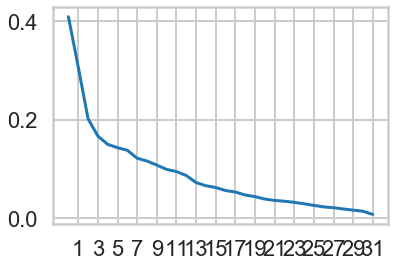

In [33]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(df_combined)

explaned_var = pca.explained_variance_
# Do the rest on your own :)
plt.plot(explaned_var)
plt.xticks(range(1, len(explaned_var),2))
plt.show()
 

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


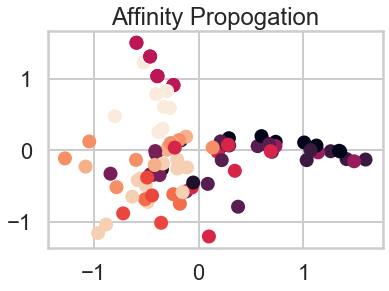

In [34]:
# Your turn
# Affinity Propogation:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation()

# fit the classifier to the data
labels = ap.fit_predict(df_combined)

# Use PCA to reduce the features
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df_combined)

# create a dataframe as described above
transformed_df = pd.DataFrame({'customer_name': df_combined.reset_index()['customer_name'], 
                               'cluster_id': labels, 
                               'x': reduced_features[:,0],
                               'y': reduced_features[:,1]})
plt.scatter(transformed_df.x, transformed_df.y, c=transformed_df['cluster_id'])
plt.title('Affinity Propogation')
plt.show()

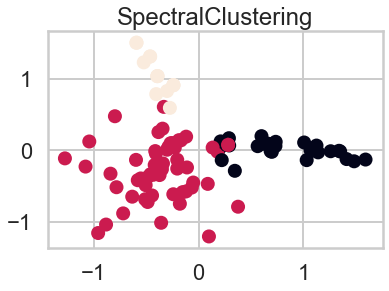

In [35]:

# Affinity Propogation:
from sklearn.cluster import SpectralClustering
clf = SpectralClustering(n_clusters=3)

# fit the classifier to the data
labels = clf.fit_predict(df_combined)

# Use PCA to reduce the features
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df_combined)

# create a dataframe as described above
transformed_df = pd.DataFrame({'customer_name': df_combined.reset_index()['customer_name'], 
                               'cluster_id': labels, 
                               'x': reduced_features[:,0],
                               'y': reduced_features[:,1]})
plt.scatter(transformed_df.x, transformed_df.y, c=transformed_df['cluster_id'])
plt.title('SpectralClustering')
plt.show()

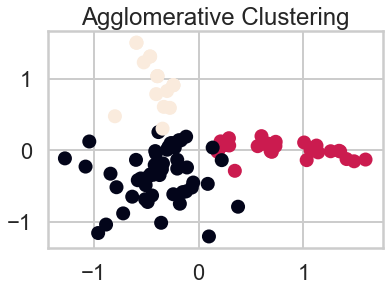

In [36]:

from sklearn.cluster import AgglomerativeClustering
clf = AgglomerativeClustering(n_clusters=3)

# fit the classifier to the data
labels = clf.fit_predict(df_combined)

# Use PCA to reduce the features
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df_combined)

# create a dataframe as described above
transformed_df = pd.DataFrame({'customer_name': df_combined.reset_index()['customer_name'], 
                               'cluster_id': labels, 
                               'x': reduced_features[:,0],
                               'y': reduced_features[:,1]})
plt.scatter(transformed_df.x, transformed_df.y, c=transformed_df['cluster_id'])
plt.title('Agglomerative Clustering')
plt.show()


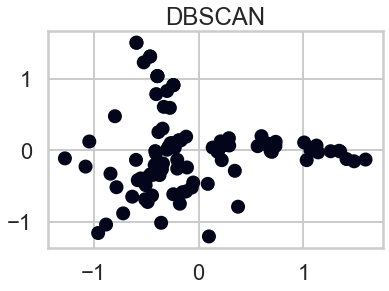

In [37]:

from sklearn.cluster import DBSCAN
clf = DBSCAN()

# fit the classifier to the data
labels = clf.fit_predict(df_combined)

# Use PCA to reduce the features
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df_combined)

# create a dataframe as described above
transformed_df = pd.DataFrame({'customer_name': df_combined.reset_index()['customer_name'], 
                               'cluster_id': labels, 
                               'x': reduced_features[:,0],
                               'y': reduced_features[:,1]})
plt.scatter(transformed_df.x, transformed_df.y, c=transformed_df['cluster_id'])
plt.title('DBSCAN')
plt.show()


I think the "Agglomerative Clustering" appears to work the best for the data inputted as the clusters  The clusters seemed to be better grouped according to color and separated the best to delineate the differenes.